In [57]:
import pandas as pd
import time 
import json
import urllib.request
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
with urllib.request.urlopen("https://alte-rs.ddnss.de/weather/processed/history.json") as url:
    data1 = json.loads(url.read().decode())

In [3]:
df = pd.DataFrame(data=data1)

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df['temp'] = pd.to_numeric(df['temp'])

In [6]:
df['pressure'] = pd.to_numeric(df['pressure'])

In [7]:
df['humidity'] = pd.to_numeric(df['humidity'])

In [8]:
df2 = df.set_index('time')

In [9]:
series = df2.rolling('10Min',min_periods=5).mean()

In [10]:
total =[df2,series]

In [11]:
conc= pd.concat(total, axis=1)

In [42]:
print(conc)

                          humidity     pressure       temp   humidity  \
time                                                                    
2018-06-22 16:20:01.656  36.116451  1025.179932  28.907051        NaN   
2018-06-22 16:20:40.606  35.238693  1025.148682  28.870728        NaN   
2018-06-22 16:21:19.756  35.684219  1025.106445  28.852566        NaN   
2018-06-22 16:21:58.636  35.843815  1025.139404  28.907051        NaN   
2018-06-22 16:22:37.505  36.053280  1025.058105  28.870728  35.787292   
2018-06-22 16:23:16.385  35.830513  1025.227051  28.834402  35.794495   
2018-06-22 16:23:34.065  36.109802  1025.098389  28.779915  35.839539   
2018-06-22 16:24:12.945  35.697521  1025.116943  28.943377  35.821787   
2018-06-22 16:24:51.846  35.275265  1025.105469  29.016026  35.761062   
2018-06-22 16:25:30.796  35.584476  1025.077637  28.816238  35.743404   
2018-06-22 16:26:09.786  35.335114  1025.070068  28.943377  35.706286   
2018-06-22 16:26:49.606  36.635128  1025.187012  28

In [11]:
testseries = series

,humidity,pressure,temp
time,,,
2018-06-22 16:20:40.606,NaN,NaN,NaN
2018-06-22 16:21:19.756,NaN,NaN,NaN
2018-06-22 16:21:58.636,NaN,NaN,NaN
2018-06-22 16:22:37.505,35.787292,1025.126514,28.881625
2018-06-22 16:23:16.385,35.794495,1025.143270,28.873754
2018-06-22 16:23:34.065,35.839539,1025.136858,28.860349
2018-06-22 16:24:12.945,35.821787,1025.134369,28.870727
2018-06-22 16:24:51.846,35.761062,1025.131158,28.886871
2018-06-22 16:25:30.796,35.743404,1025.125806,28.879808


In [12]:
init = testseries.index[0]

In [76]:
series.loc[init]

humidity   NaN
pressure   NaN
temp       NaN
Name: 2018-06-22 16:20:01.656000, dtype: float64

In [13]:
for time in testseries.index:
    if time-init > timedelta(minutes = 5):
        init = time
    else:
        testseries = testseries.drop(time)
        
        
   
    

In [85]:
testseries

,humidity,pressure,temp
time,,,
2018-06-22 16:25:30.796,35.743404,1025.125806,28.879808
2018-06-22 16:30:44.135,36.051825,1025.124542,28.802618
2018-06-22 16:36:02.356,37.181235,1025.162430,28.506343
2018-06-22 16:41:20.815,38.239161,1025.227509,28.176015
2018-06-22 16:46:39.475,38.701938,1025.252014,28.105636
2018-06-22 16:51:52.476,38.806671,1025.249313,28.126069
2018-06-22 16:57:05.866,39.742201,1025.259293,28.008014
2018-06-22 17:02:19.785,41.214694,1025.241165,27.951256
2018-06-22 17:07:32.416,41.235266,1025.241379,28.038662


In [14]:
Y = testseries[40:]

Hier haben wir die Targetvariable selektiert

In [165]:
Y

,humidity,pressure,temp
time,,,
2018-06-22 20:00:19.935,48.285611,1025.611313,26.399506
2018-06-22 20:05:35.175,48.080302,1025.680405,26.422209
2018-06-22 20:10:50.555,47.475388,1025.720459,26.447182
2018-06-22 20:16:06.745,47.111524,1025.721176,26.433560
2018-06-22 20:21:22.246,46.988089,1025.724792,26.438101
2018-06-22 20:26:37.885,47.109238,1025.728317,26.306424
2018-06-22 20:31:53.576,47.219997,1025.759537,26.209936
2018-06-22 20:37:09.396,47.212101,1025.799347,26.221288
2018-06-22 20:42:25.266,47.141447,1025.802338,26.215612


In [15]:
length = len(testseries)

In [16]:
print(length)

2195


Jetzt gehts los

In [109]:
testseries.loc[testseries.index[0]]

humidity      35.743404
pressure    1025.125806
temp          28.879808
Name: 2018-06-22 16:25:30.796000, dtype: float64

In [17]:
x = np.zeros((length-40, 60))

In [164]:

testseries.loc[testseries.index[0]]

humidity      35.743404
pressure    1025.125806
temp          28.879808
Name: 2018-06-22 16:25:30.796000, dtype: float64

In [18]:
for row in range(0,length-40):
    for width in range(0,20):
        for i in range(0,3):
            x[row,3*width+i]= testseries.loc[testseries.index[row + width]][i]

In [20]:
y = Y.values

In [19]:
print(x[0])

[   35.74340363  1025.12580566    28.87980804    36.05182481  1025.12454224
    28.80261767    37.18123507  1025.16242981    28.50634348    38.23916078
  1025.22750855    28.17601526    38.70193815  1025.25201416    28.10563624
    38.80667138  1025.24931335    28.12606895    39.74220109  1025.2592926
    28.00801361    41.21469355  1025.24116516    27.95125592    41.23526621
  1025.24137878    28.0386622     40.85664916  1025.30384827    28.14196074
    41.30654287  1025.39454651    28.10450077    42.24124122  1025.43695068
    27.94558001    42.72355247  1025.41156006    27.84909236    42.88023663
  1025.38156128    27.74465859    42.69051218  1025.36283874    27.71741498
    42.69549942  1025.33816528    27.80709195    43.09655976  1025.32145691
    27.85590339    43.4963727   1025.32043457    27.89449847    43.42530394
  1025.33094788    27.90017414    43.56349325  1025.36236572    27.83774066]


In [40]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(x)
x = imputer.transform(x)
imputer = imputer.fit(y)
y = imputer.transform(y)

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [43]:
X_train = sc_X.fit_transform(X_train)

In [44]:
X_test = sc_X.transform(X_test)

In [45]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
>>> y_true = [3, -0.5, 2, 7]

In [56]:
mean_squared_error(y_test, y_pred)

2.9412594191195116

In [99]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring= 'neg_mean_absolute_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

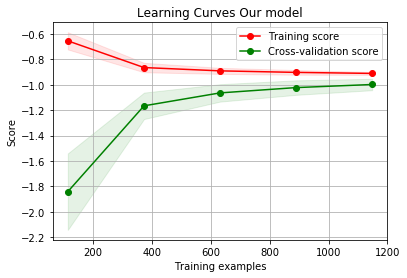

In [101]:
title = "Learning Curves Our model"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(regressor, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [ ]:
plt.

Fazit: Das System lernt doch!

In [63]:
y_test[0]

array([   29.26208814,  1026.25531684,    37.28193325])

In [64]:
y_pred[0]

array([   28.48644612,  1026.17653247,    36.0360115 ])

In [65]:
y_test[126]

array([   41.74468528,  1031.31079102,    29.81920751])

In [78]:
y_pred[126]

array([   42.19149352,  1031.37648107,    30.18654374])

In [86]:
len(y_train[:,0])

1436

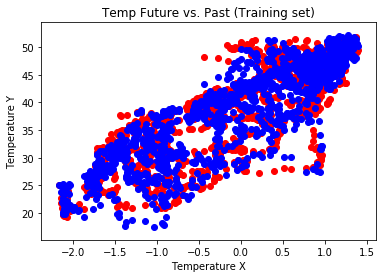

In [102]:
plt.scatter(X_train[:,0], y_train[:,0], color = 'red')
plt.scatter(X_train[:,0], regressor.predict(X_train)[:,0], color = 'blue')
plt.title('Temp Future vs. Past (Training set)')
plt.xlabel('Temperature X')
plt.ylabel('Temperature Y')
plt.show()



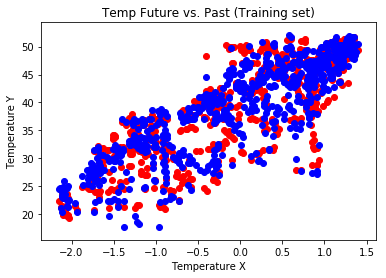

In [103]:
# Visualising the Test set results
plt.scatter(X_test[:,0], y_test[:,0], color = 'red')
plt.scatter(X_test[:,0], regressor.predict(X_test)[:,0], color = 'blue')
plt.title('Temp Future vs. Past (Training set)')
plt.xlabel('Temperature X')
plt.ylabel('Temperature Y')
plt.show()